# som susi clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# --- for running the script without pip
import sys
sys.path.append("../")
# ---

import susi
from susi.SOMPlots import plot_umatrix

(100, 2) (100,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


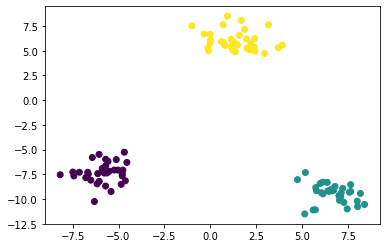

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3)

print(X.shape,y.shape)
print(type(X),type(y))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=y)
plt.show()

In [4]:
som = susi.SOMClustering(
    n_rows=50,
    n_columns=50,
    n_jobs=-1,
    random_state=1,
    verbose=10,
    n_iter_unsupervised=1000
    
)
som.fit(X)
print("SOM fitted!")


unsuper: 100%|████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 2406.40it/s]
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done  21 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=32)]: Done  48 out of 100 | elapsed:    1.9s remaining:    2.1s
[Parallel(n_jobs=32)]: Done  59 out of 100 | elapsed:    2.0s remaining:    1.4s
[Parallel(n_jobs=32)]: Done  70 out of 100 | elapsed:    2.0s remaining:    0.8s
[Parallel(n_jobs=32)]: Done  81 out of 100 | elapsed:    2.0s remaining:    0.5s


SOM fitted!


[Parallel(n_jobs=32)]: Done  92 out of 100 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    2.1s finished


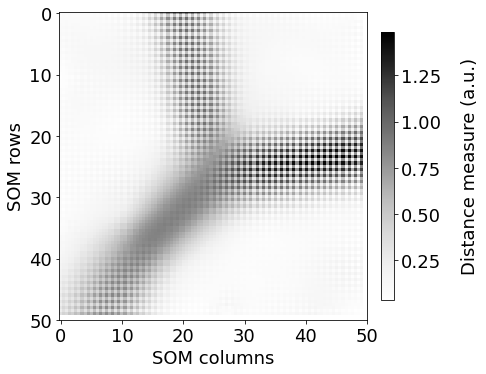

In [5]:
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 50, 50)
plt.show()

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Batch computation too fast (0.0154s.) Setting batch_size=2.
[Parallel(n_jobs=32)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  48 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=32)]: Done  59 out of 100 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=32)]: Done  70 out of 100 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=32)]: Done  81 out of 100 | elapsed:    0.4s remaining:    0.1s


100


[Parallel(n_jobs=32)]: Done  92 out of 100 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.5s finished


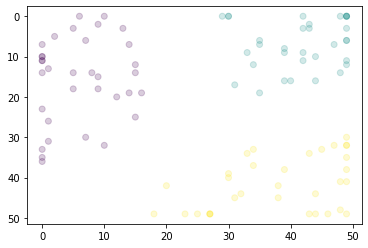

In [7]:
clusters = som.get_clusters(X)
print(len(clusters))
plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=y, alpha=0.2)
plt.gca().invert_yaxis()
plt.show()

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Batch computation too fast (0.0142s.) Setting batch_size=2.
[Parallel(n_jobs=32)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=32)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done  48 out of 100 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=32)]: Done  59 out of 100 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=32)]: Done  70 out of 100 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=32)]: Done  81 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  92 out of 100 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.5s finished


(array([[0., 3., 2., 0., 0., 1., 2., 0., 4., 6.],
        [2., 1., 1., 0., 0., 0., 1., 4., 1., 3.],
        [6., 2., 0., 2., 0., 0., 1., 0., 2., 3.],
        [0., 3., 1., 1., 0., 0., 1., 2., 2., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [2., 1., 1., 0., 0., 0., 2., 0., 1., 5.],
        [2., 0., 0., 0., 0., 0., 2., 1., 0., 2.],
        [0., 0., 0., 0., 1., 0., 2., 1., 1., 2.],
        [0., 0., 0., 1., 1., 4., 1., 1., 2., 3.]]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <matplotlib.collections.QuadMesh at 0x7fa214020450>)

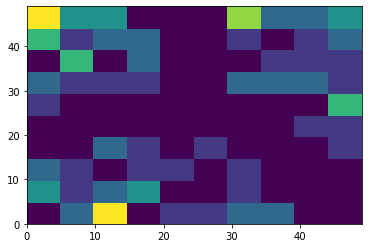

In [9]:
bmu_list = som.get_bmus(X)
plt.hist2d([x[0] for x in bmu_list], [x[1] for x in bmu_list])

In [10]:
from joblib import load
import numpy as np
import pandas as pd

X_tr=load('X_tr.joblib') 
labels=load("y_tr.joblib")
X_tr=X_tr[:,:300]+X_tr[:,300:]
print(X_tr.shape)

labels = labels.reshape((-1,)) ###converts (n,1) to (n,)
umap_data = np.vstack((X_tr.T, labels)).T
umap_df = pd.DataFrame(data=umap_data)

#randomly sample only 1 %age of the points from the original dataframe
umap_df=umap_df.sample(frac=0.01, replace=False, random_state=1)

labels= umap_df.iloc[:,-1] ### select all the labels
umap_df = umap_df.iloc[:, :-1] ### select all the features corresponding
numpy_X_tr=umap_df.to_numpy()
print(labels.shape,umap_df.shape)
labels=labels.to_numpy()
print(type(labels),type(numpy_X_tr))

(362168, 300)
(3622,) (3622, 300)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [11]:
#for large implementations
import susi
from susi.SOMPlots import plot_umatrix

som = susi.SOMClustering(
    n_rows=50,
    n_columns=50,
    n_jobs=-1,
    random_state=1,
    verbose=10,
    n_iter_unsupervised=1000000
    
)
som.fit(numpy_X_tr,labels)
print("SOM fitted!")

unsuper:   0%|                                            | 2190/1000000 [00:17<2:11:08, 126.81it/s]


KeyboardInterrupt: 

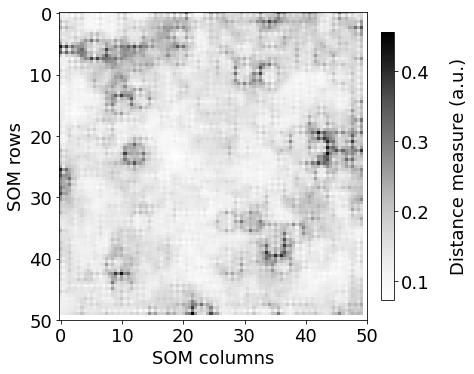

In [16]:
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 50, 50)
plt.show()

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Batch computation too fast (0.1964s.) Setting batch_size=2.
[Parallel(n_jobs=32)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=32)]: Done  21 tasks      | elapsed:    2.8s
[Parallel(n_jobs=32)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=32)]: Done  49 tasks      | elapsed:    6.5s
[Parallel(n_jobs=32)]: Done  64 tasks      | elapsed:    8.6s
[Parallel(n_jobs=32)]: Batch computation too slow (8.5358s.) Setting batch_size=1.
[Parallel(n_jobs=32)]: Done  98 tasks      | elapsed:   10.9s
[Parallel(n_jobs=32)]: Done 132 tasks      | elapsed:   13.1s
[Parallel(n_jobs=32)]: Done 170 tasks      | elapsed:   15.6s
[Parallel(n_jobs=32)]: Done 200 tasks      | elapsed:   18.1s
[Parallel(n_jobs=32)]: Done 221 tasks      | elapsed:   20.9s
[Parallel(n_jobs=32)]: Done 242 tasks      | elapsed:   23.7s
[Parallel(n_jobs=32)]: Done 265 tasks      | elapsed:   26.8s
[Parallel(n_j

3622


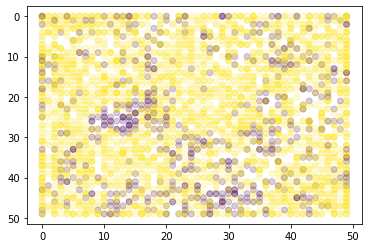

In [17]:
clusters = som.get_clusters(numpy_X_tr)
print(len(clusters))
plt.scatter(x=[c[1] for c in clusters], y=[c[0] for c in clusters], c=labels, alpha=0.2)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#som classifier 
from sklearn.metrics import accuracy_score
from joblib import dump, load
import numpy as np
import susi
from susi.SOMPlots import plot_umatrix

X_tr_complete=load('X_tr.joblib')
X_tr_complete=X_tr_complete[:,:300]+X_tr_complete[:,300:]
print(X_tr_complete.shape)

y_tr_complete=load("y_tr.joblib")
shapes=y_tr_complete.shape
y_tr_complete = y_tr_complete.reshape((shapes[0],))#reshape y to y,

#standardization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_tr_complete))
X_tr_new=scaler.transform(X_tr_complete)
print("this is my new X_tr:{}".format(X_tr_new.shape))
print("are both the array's equal: ",np.array_equal(X_tr_complete,X_tr_new))

#train test split and random splitting
from sklearn.model_selection import train_test_split
# create training and testing data (80% train and 20% test)
X_tr, X_test, y_tr, y_test = train_test_split(X_tr_new, y_tr_complete, test_size=0.2,random_state=5)#test size here relates to second var i.e test

print("="*20+" train data (80%)"+"="*20)
print (X_tr.shape, y_tr.shape)
print("="*20+" test data (20%)"+"="*20)
print (X_test.shape, y_test.shape)

som = susi.SOMClassifier(
    n_rows=20,
    n_columns=20,
    n_iter_unsupervised=1000,
    n_iter_supervised=1000,
    random_state=1,
    verbose=10,
    n_jobs=-1
)

som.fit(X_tr, y_tr)

y_pred = som.predict(X_test,y_test)
print("Accuracy: {0:.1f} %".format(som.score(X_test, y_test)*100))

u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 50, 50)
plt.show()




(362168, 300)
StandardScaler(copy=True, with_mean=True, with_std=True)
this is my new X_tr:(362168, 300)
are both the array's equal:  False


unsuper:   0%|                                                             | 0/1000 [00:00<?, ?it/s]

==================== train data (80%)====================
(289734, 300) (289734,)
==================== test data (20%)====================
(72434, 300) (72434,)


unsuper: 100%|████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1548.26it/s]
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    7.5s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   11.1s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   14.7s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:   19.1s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   23.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:   28.4s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:   34.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:   39.9s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:   45.7s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:   52.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   59.0s
[Parallel(n_jobs=8)]: Done 165 

[Parallel(n_jobs=8)]: Done 9232 tasks      | elapsed: 57.7min
[Parallel(n_jobs=8)]: Done 9369 tasks      | elapsed: 58.6min
[Parallel(n_jobs=8)]: Done 9506 tasks      | elapsed: 59.4min
[Parallel(n_jobs=8)]: Done 9645 tasks      | elapsed: 60.3min
[Parallel(n_jobs=8)]: Done 9784 tasks      | elapsed: 61.1min
[Parallel(n_jobs=8)]: Done 9925 tasks      | elapsed: 62.0min
[Parallel(n_jobs=8)]: Done 10066 tasks      | elapsed: 62.8min
[Parallel(n_jobs=8)]: Done 10209 tasks      | elapsed: 63.7min
[Parallel(n_jobs=8)]: Done 10352 tasks      | elapsed: 64.6min
[Parallel(n_jobs=8)]: Done 10497 tasks      | elapsed: 65.5min
[Parallel(n_jobs=8)]: Done 10642 tasks      | elapsed: 66.4min
[Parallel(n_jobs=8)]: Done 10789 tasks      | elapsed: 67.3min
[Parallel(n_jobs=8)]: Done 10936 tasks      | elapsed: 68.2min
[Parallel(n_jobs=8)]: Done 11085 tasks      | elapsed: 69.1min
[Parallel(n_jobs=8)]: Done 11234 tasks      | elapsed: 70.1min
[Parallel(n_jobs=8)]: Done 11385 tasks      | elapsed: 71.0mi

In [ ]:
from joblib import dump, load
dump(model_1, 'SOM_1k_best_lz4.joblib', compress="lz4")
print("model saved in the directory")